In [285]:
import pandas as pd
import yfinance as yf
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as scs
import statsmodels.api as sm
plt.style.use('seaborn')
%matplotlib inline

In [286]:
api = 'caf2a437b55be8f56406870c1bed3521'
fred = Fred(api_key= api)

In [287]:
data_realw = pd.DataFrame(fred.get_series(series_id='LEU0252881600A'), columns = ['Real Wages'])
data_realw = (data_realw.pct_change())*100
data_cpi = pd.DataFrame(fred.get_series('FPCPITOTLZGUSA'), columns = ['Annual CPI'])
data_cpi = data_cpi
unemployment = pd.DataFrame(fred.get_series('UNRATE'), columns= ['Unemployment Rate'])
debt = pd.DataFrame(fred.get_series('GFDEGDQ188S'), columns= ['Debt%GDP'])
ten_year = pd.DataFrame(fred.get_series('DGS10'), columns= ['Annual 10 Year Yield'])
ten_year = ten_year.to_period("Y")

In [288]:
ten_year

,Annual 10 Year Yield
1962,4.06
1962,4.03
1962,3.99
1962,4.02
1962,4.03
...,...
2022,3.48
2022,3.57
2022,3.69
2022,3.68


In [289]:
data_cpi = data_cpi.join(data_realw, how = 'inner')
data_cpi = data_cpi.join(unemployment, how = 'inner')
data_cpi.dropna(inplace = True)
data_cpi = data_cpi.join(debt, how = 'inner')
data_cpi["Ten Year"] = ten_year['Annual 10 Year Yield']


C:\Users\dcste\AppData\Local\Temp\ipykernel_9884\3117937075.py:5: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  data_cpi["Ten Year"] = ten_year['Annual 10 Year Yield']


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
data_cpi = data_cpi.to_period("Y")

In [ ]:
data_cpi.corr()

,Annual CPI,Real Wages,Unemployment Rate,Debt%GDP
Annual CPI,1.000000,-0.662109,0.130494,-0.532115
Real Wages,-0.662109,1.000000,-0.316133,0.207387
Unemployment Rate,0.130494,-0.316133,1.000000,-0.193820
Debt%GDP,-0.532115,0.207387,-0.193820,1.000000


<AxesSubplot:title={'center':'Annual Inflation and Real Wage Growth '}>

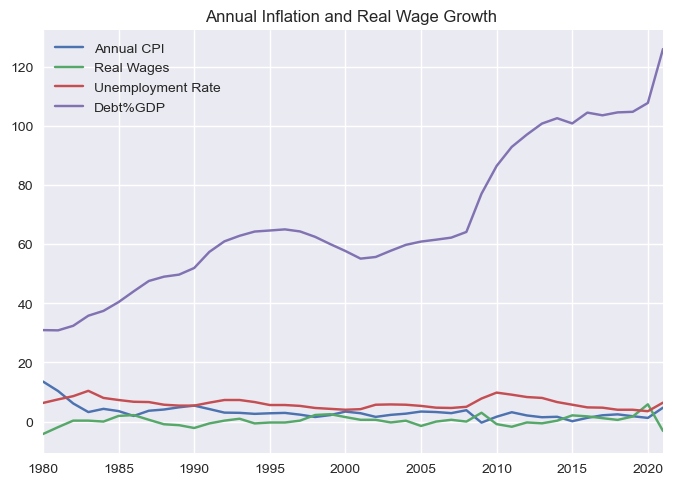

In [ ]:
data_cpi.plot(title = "Annual Inflation and Real Wage Growth ")

<AxesSubplot:title={'center':' Real Wages and Unemployment Rate Correlation with CPI'}>

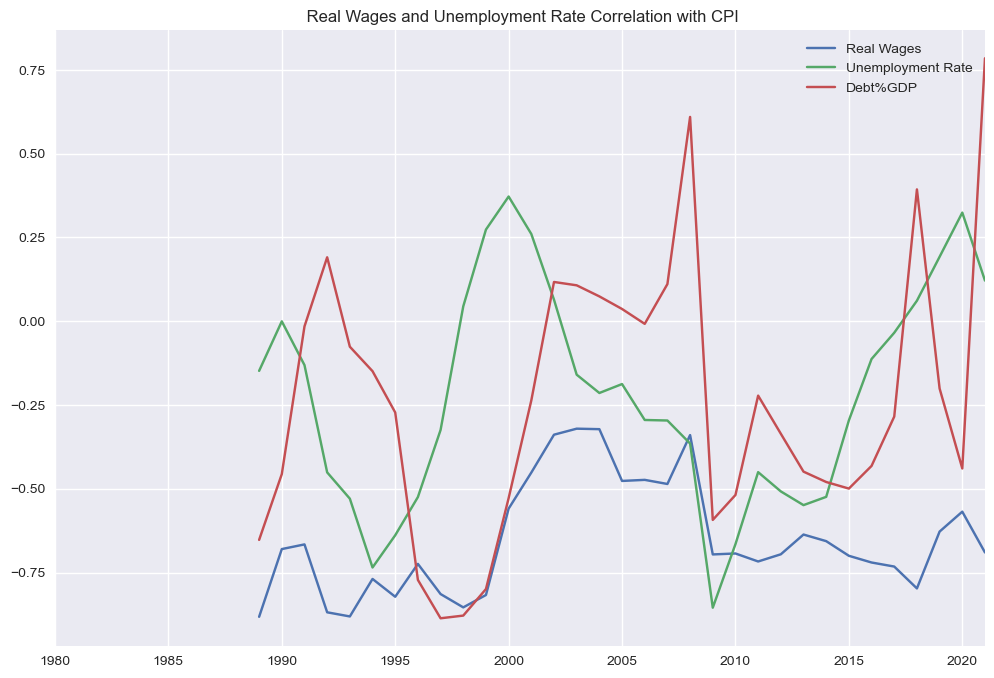

In [ ]:
(data_cpi[['Real Wages', 'Unemployment Rate', 'Debt%GDP']].rolling(10).corr(data_cpi['Annual CPI'])).plot(title=' Real Wages and Unemployment Rate Correlation with CPI', figsize = (12,8))

# Linear Regression 

- Equation:

$ unrate  = \beta_{0} + \beta_{realwage}*X +\beta_{cpi}*X + e$

In [ ]:
MAT = sm.add_constant(data_cpi[['Real Wages','Annual CPI', 'Debt%GDP']])
Y = data_cpi[['Unemployment Rate']].dropna()

In [ ]:
re = sm.OLS(Y, MAT).fit()

In [ ]:
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Unemployment Rate   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2.424
Date:                Mon, 26 Dec 2022   Prob (F-statistic):             0.0807
Time:                        02:28:34   Log-Likelihood:                -76.422
No. Observations:                  42   AIC:                             160.8
Df Residuals:                      38   BIC:                             167.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2303      1.229      6.698      0.000       5.743      10.718
Real Wages    -0.4556      0.194     -2.351      0.024      -0.848      -0.063
Annual CPI    -0.2282      0.163     -1.404      0.169      -0.557       0.101
Debt%GDP      -0.0180      0.012     -1.499      0.142      -0.042       0.006
==============================================================================
Omnibus:                        4.086   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.811
Skew:                           0.682   Prob(JB):                        0.149
Kurtosis:                       2.436   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data_cpi.mean().to_frame("Average")

,Average
Annual CPI,3.212331
Real Wages,0.259993
Unemployment Rate,6.157143
Debt%GDP,68.031079
